In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

module_path = '/Users/morton/PycharmProjects/freerec'
data_file = os.path.join(module_path, 'data', 'cfr_raw_data.csv')

In [2]:
# read information about all trials
df = pd.read_csv(data_file)
df

,subject,list,position,trial_type,item
0,1,1,1,study,TOWEL
1,1,1,2,study,LADLE
2,1,1,3,study,THERMOS
3,1,1,4,study,LEGO
4,1,1,5,study,BACKPACK
...,...,...,...,...,...
71224,47,48,12,recall,CD
71225,47,48,13,recall,SURGE PROTECTOR
71226,47,48,14,recall,DOORKNOB
71227,47,48,15,recall,LENIN MAUSOLEUM


In [3]:
# merge information from study and recall trials
keys = ['subject', 'list', 'item']
dfm = pd.merge(df.loc[df['trial_type'] == 'study'][keys + ['position']], 
               df.loc[df['trial_type'] == 'recall'][keys + ['position']],
               left_on=keys, right_on=keys, how='outer')

In [4]:
dfi = dfm.rename(columns={'position_x': 'input', 'position_y': 'output'})
dfi.loc[:, 'recalled'] = dfi['output'].notna().astype('int')
dfi

,subject,list,item,input,output,recalled
0,1,1,TOWEL,1.0,13.0,1
1,1,1,LADLE,2.0,NaN,0
2,1,1,THERMOS,3.0,NaN,0
3,1,1,LEGO,4.0,18.0,1
4,1,1,BACKPACK,5.0,10.0,1
...,...,...,...,...,...,...
48168,47,32,PETRA,NaN,17.0,1
48169,47,37,SOCK,NaN,14.0,1
48170,47,39,HOOVER DAM,NaN,15.0,1
48171,47,45,PEN,NaN,5.0,1


In [5]:
# get just the first output for each item so repeats are not double counted
dff = dfi.sort_values('output').groupby(['subject', 'list', 'item']).first()

# remove intrusions
clean = dff.loc[dff['input'].notna()]
clean

input  output  recalled
subject list item                                     
1       1    BACKPACK            5.0    10.0         1
             BAYONET            17.0     3.0         1
             CAR SEAT           16.0     5.0         1
             CHAIN              24.0     1.0         1
             DOORKNOB            8.0    11.0         1
...                              ...     ...       ...
47      48   SALT FLATS          6.0     8.0         1
             SUPREME COURT      16.0     NaN         0
             SURGE PROTECTOR    11.0    13.0         1
             VIN DIESEL         23.0     2.0         1
             WRIGLEY BUILDING   17.0     NaN         0

[46080 rows x 3 columns]

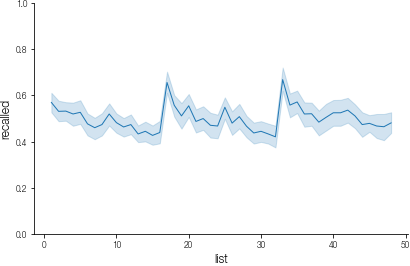

In [6]:
rec_list = clean.groupby(['subject', 'list'])['recalled'].mean()
g = sns.lineplot(x='list', y='recalled', data=rec_list.reset_index());
g.set_ylim(0, 1);

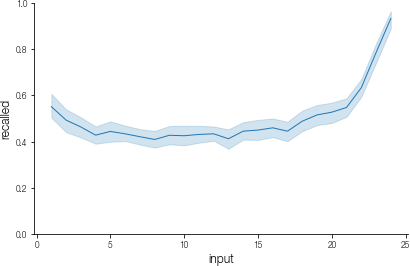

In [7]:
rec_pos = clean.groupby(['subject', 'input'])['recalled'].mean()
g = sns.lineplot(x='input', y='recalled', data=rec_pos.reset_index());
g.set_ylim(0, 1);